# Bevan Joubert

## Project 5 - Unsupervised Learning

In [1]:
# Import all the required packages.
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Data preparation.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
# K-Means Clustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score
# Do some formatting of the page.
from IPython.core.interactiveshell import InteractiveShell
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:0.4f}'.format)

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Import the dataset.
customerData = pd.read_excel('Credit Card Customer Data.xlsx')
customerData.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
customerData.shape

(660, 7)

### Univariate Analysis

In [4]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
# All features are numerical.
# All features are continuous, but can only take on integer values.

In [6]:
# Check for any null values.
customerData.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# Check how many records contain 0 values for each of the columns.
customerData.isin([0]).sum()

Sl_No                    0
Customer Key             0
Avg_Credit_Limit         0
Total_Credit_Cards       0
Total_visits_bank      100
Total_visits_online    144
Total_calls_made        97
dtype: int64

In [8]:
# There are no null values.
# There are 0 values, but these 0 values are practical and do not seem to be errenious.
# It does not seem that there are any missing values.

In [9]:
# Check for duplicate records.
customerData.drop('Sl_No', axis='columns').duplicated().sum()

0

In [10]:
customerData.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [11]:
# You would expect Customer Key to have 660 entries, as this should be unique for each customer.
# Investiagte the records which have duplicate values of Customer Key.

In [12]:
# Check which customer keys have more than one entry.
customerData['Customer Key'].value_counts().head(10)

47437    2
37252    2
97935    2
96929    2
50706    2
75775    1
43679    1
33295    1
67911    1
94529    1
Name: Customer Key, dtype: int64

In [13]:
multCustomerKeys = customerData.groupby(['Customer Key']).count().sort_values(by="Sl_No", ascending = False)[0:5].index.tolist()

In [14]:
multCustomerKeys

[96929, 97935, 37252, 50706, 47437]

In [15]:
multCustomerKeys_df = customerData[customerData['Customer Key'] == multCustomerKeys[0]]
for customerKey in multCustomerKeys:
    multCustomerKeys_df = multCustomerKeys_df.append(customerData[customerData['Customer Key'] == customerKey])
multCustomerKeys_df.drop_duplicates(inplace=True)

In [16]:
multCustomerKeys_df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [17]:
# These all seem to be totally different customers who somehow got the same customer keys.
# This does not really matter as the customer key field will be dropped anyway.

In [18]:
# Drop the Sl_No and the Customer Key.
# Add _f subscript for fixed, as any data manipulation will take place with this new dataframe
customerData_f = customerData.drop(['Sl_No', 'Customer Key'], axis='columns')

In [19]:
# Look at the 5 number summary of the features.
customerData_f.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0000,34574.2424,37625.4878,3000.0000,10000.0000,18000.0000,48000.0000,200000.0000
Total_Credit_Cards,660.0000,4.7061,2.1678,1.0000,3.0000,5.0000,6.0000,10.0000
Total_visits_bank,660.0000,2.4030,1.6318,0.0000,1.0000,2.0000,4.0000,5.0000
Total_visits_online,660.0000,2.6061,2.9357,0.0000,1.0000,2.0000,4.0000,15.0000
Total_calls_made,660.0000,3.5833,2.8653,0.0000,1.0000,3.0000,5.0000,10.0000


In [20]:
# Look at the skewness of the features.
customerData_f.skew()

Avg_Credit_Limit      2.2024
Total_Credit_Cards    0.1449
Total_visits_bank     0.1419
Total_visits_online   2.2256
Total_calls_made      0.6589
dtype: float64

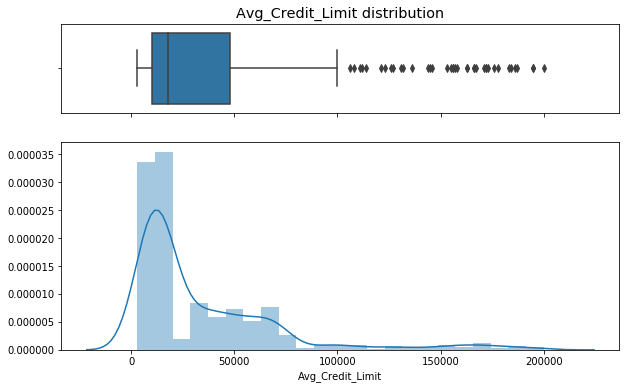

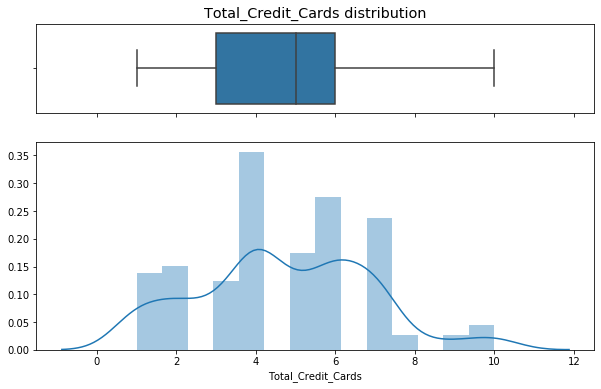

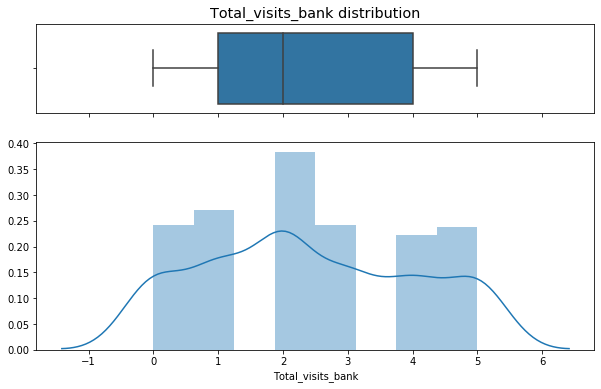

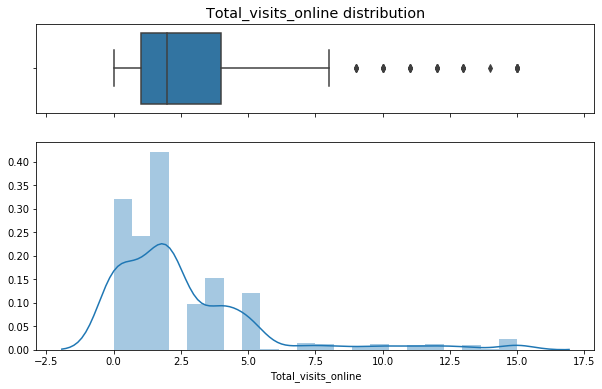

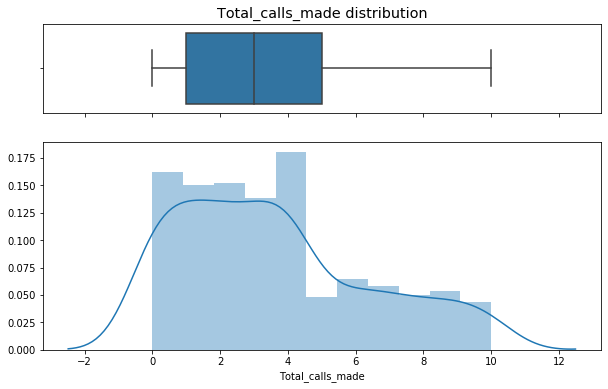

In [21]:
# Create a function to plot the distribution of a variable with a box plot and kde.
def plotDistribution(dataFrame, column):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.3, .7)}, figsize=(10,6))
    ax_box.set_title(column + " distribution", size='x-large')
    # Add a graph in each part
    sns.boxplot(dataFrame[column], ax=ax_box)
    sns.distplot(dataFrame[column], ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

# Plot the distributions and boxplots of all columns to visualise the 5 number summary and skewness.
for column in customerData_f:
    plotDistribution(customerData_f, column)

### Bivariate Analysis

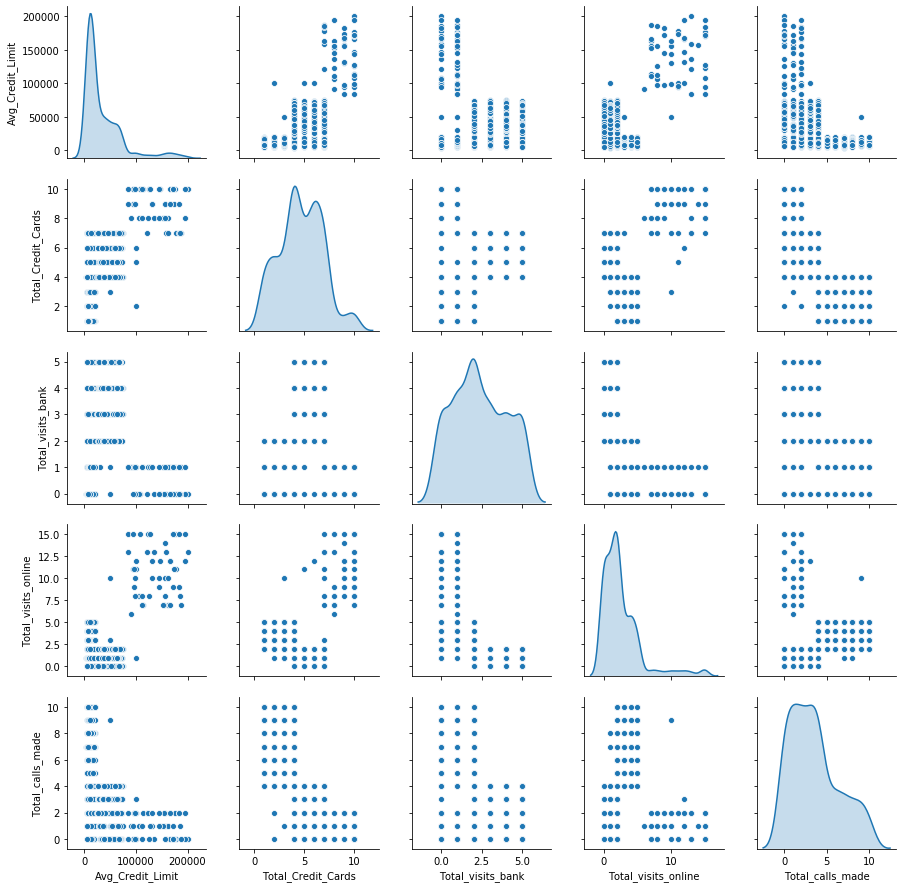

In [22]:
sns.pairplot(customerData_f, diag_kind='kde')

In [23]:
# Look for any correlation between the features.
customerData_f.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.0000,0.6089,-0.1003,0.5514,-0.4144
Total_Credit_Cards,0.6089,1.0000,0.3158,0.1678,-0.6513
Total_visits_bank,-0.1003,0.3158,1.0000,-0.5519,-0.5060
Total_visits_online,0.5514,0.1678,-0.5519,1.0000,0.1273
Total_calls_made,-0.4144,-0.6513,-0.5060,0.1273,1.0000


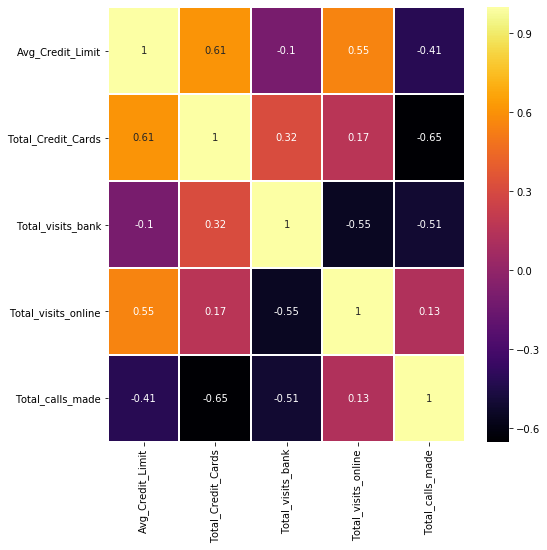

In [24]:
# Represent the correlation visually.
plt.figure(figsize=(8,8))
sns.heatmap(customerData_f.corr(), annot=True, linewidth=1, cmap='inferno')

In [25]:
# There are quite a number of reasonably high correlations here.
# Of course the Avg_Credit_Limit is quite strongly correlated with the Total_Credit_Cards.
# The various ways of communicating with the bank seem to be inversely correlated with each other, this makes sense.
# It would make sense that a customer prefers a certain way to communicate with the bank and uses that method often and the other methods not so often.
# What is strange though is that people who have higher average limit like to visit online more while people with more cards like to vist the bank more, neither of those like to make calls to the bank.

### Feature Engineering

In [26]:
# Take the logarithm of Avg_Credit_Limit to make the distribution more normal.
customerData_f['Avg_Credit_Limit'] = np.log(customerData_f['Avg_Credit_Limit'])

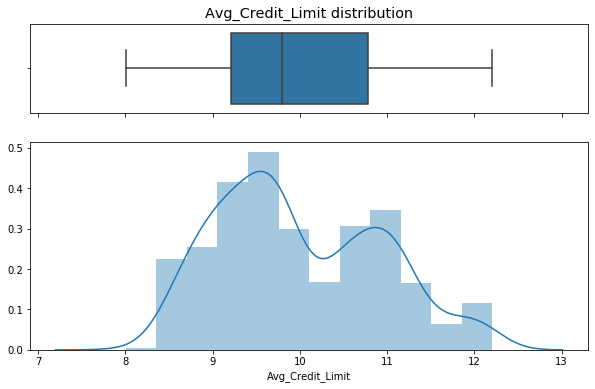

In [27]:
# Plot the distribution of Avg_Credit_Limit to see if it has improved.
plotDistribution(customerData_f, 'Avg_Credit_Limit')

In [28]:
# That is much better, no more outliers for Avg_Credit_Limit.

In [29]:
# Look how much the skewness has improved.
customerData_f.skew()

Avg_Credit_Limit      0.3938
Total_Credit_Cards    0.1449
Total_visits_bank     0.1419
Total_visits_online   2.2256
Total_calls_made      0.6589
dtype: float64

In [30]:
# First scale the data.
customerData_f = customerData_f.apply(zscore)
customerData_f.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0000,-0.0000,1.0008,-2.1389,-0.8447,-0.2128,0.8415,2.3756
Total_Credit_Cards,660.0000,-0.0000,1.0008,-1.7109,-0.7876,0.1357,0.5973,2.4439
Total_visits_bank,660.0000,0.0000,1.0008,-1.4737,-0.8605,-0.2472,0.9794,1.5927
Total_visits_online,660.0000,0.0000,1.0008,-0.8884,-0.5475,-0.2066,0.4752,4.2250
Total_calls_made,660.0000,-0.0000,1.0008,-1.2515,-0.9023,-0.2037,0.4948,2.2411


### K-Means Clustering

In [31]:
# Calculate all the data required for the skree plot.
clusterRange = range(1,11)
clusterErrors = []
for numClusters in clusterRange:
    model = KMeans(n_clusters=numClusters)
    model.fit(customerData_f)
    #clusterLabels = model.labels_
    #clusterCenters = model.cluster_centers_
    clusterErrors.append(model.inertia_)

skreePlot_df = pd.DataFrame({"Num Clusters":clusterRange, "Cluster Errors":clusterErrors})
skreePlot_df

,Num Clusters,Cluster Errors
0,1,3300.0000
1,2,1980.6550
2,3,1090.3510
3,4,860.7483
4,5,775.8160
5,6,697.7496
6,7,634.2121
7,8,599.0129
8,9,571.0521
9,10,542.1281


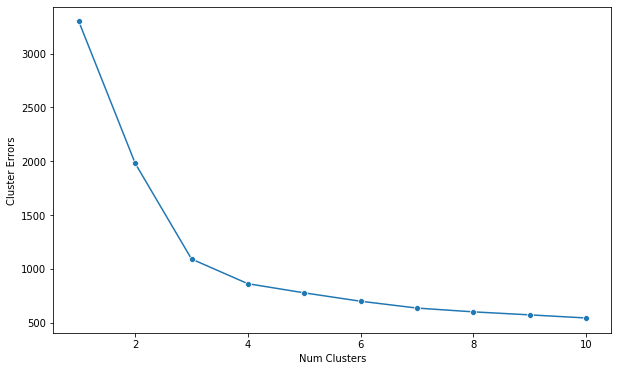

In [32]:
# Plot the skree plot.
plt.figure(figsize=(10,6))
sns.lineplot(skreePlot_df['Num Clusters'], skreePlot_df['Cluster Errors'], marker="o")

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

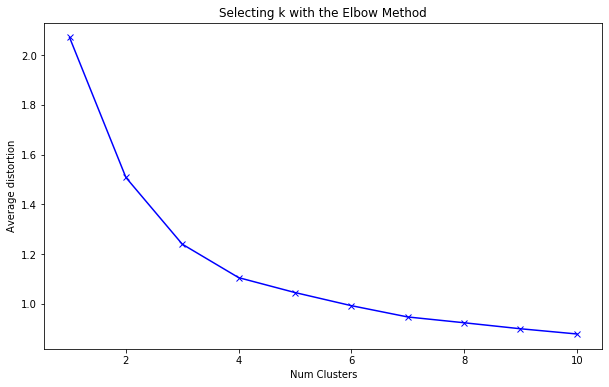

In [33]:
# Alternate way of plotting the skree plot.
clusterRange=range(1,11)
meanDistortions=[]

for numClusters in clusterRange:
    model=KMeans(n_clusters=numClusters)
    model.fit(customerData_f)
    prediction=model.predict(customerData_f)
    meanDistortions.append(sum(np.min(cdist(customerData_f, model.cluster_centers_, 'euclidean'), axis=1)) / customerData_f.shape[0])

plt.figure(figsize=(10,6))
plt.plot(clusterRange, meanDistortions, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [34]:
# This method yields a curve with slightly less sharp elbows. So it is useful to use both methods.

In [35]:
# The sharpest elbow occurs at K=3, but K=4 also seems like a possible elbow point.
# However, since there are 3 methods of contacting the bank, it makes more sense to use 3 clusters.
model_k3 = KMeans(n_clusters=3, random_state=7)
model_k3.fit(customerData_f)

# Predict the cluster for each record and append that to the dataframe.
prediction_k3 = model_k3.predict(customerData_f)
customerData_k3 = customerData_f.copy()
customerData_k3['Cluster'] = prediction_k3
customerData_k3.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.6305,-1.2492,-0.8605,-0.5475,-1.2515,1
1,0.8854,-0.7876,-1.4737,2.5205,1.8919,0
2,0.8854,1.0590,-0.8605,0.1343,0.1455,1
3,0.3363,0.1357,-0.8605,-0.5475,0.1455,1
4,1.6305,0.5973,-1.4737,3.2023,-0.2037,2


In [36]:
# Have a look how many records are in each cluster.
customerData_k3.groupby(['Cluster']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,225,225,225,225,225
1,385,385,385,385,385
2,50,50,50,50,50


In [37]:
# Have a look at the centers of the cluster.
centroids_k3 = model_k3.cluster_centers_
centroids_df_k3 = pd.DataFrame(centroids_k3, columns=list(customerData_f))
centroids_df_k3.transpose()

,0,1,2
Avg_Credit_Limit,-0.7310,0.1718,1.9665
Total_Credit_Cards,-1.0543,0.3743,1.8622
Total_visits_bank,-0.8986,0.6688,-1.1058
Total_visits_online,0.3206,-0.5546,2.8273
Total_calls_made,1.1437,-0.5548,-0.8743


In [38]:
# Cluster 2 has the highest average credit limit and the highest number of cards.
# Cluster 0 seems to be people who like to call the bank.
# Clusters 1 seems to be people who like to go to the bank.
# Cluster 2 seems to be people who make use of online banking.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C45EC288>,
      dtype=object)

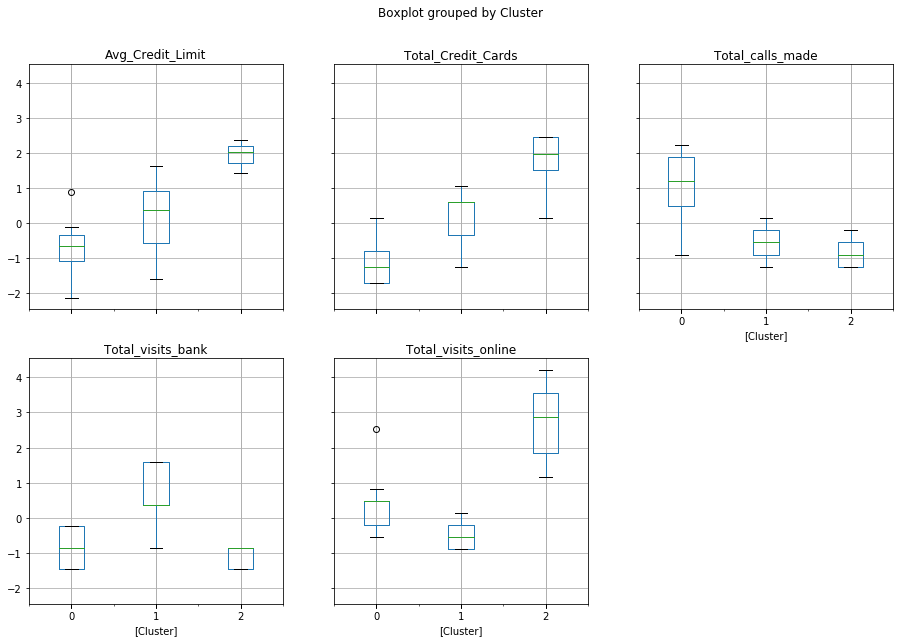

In [39]:
# View the distributions of each feature within each cluster by means of a boxplot.
customerData_k3.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

In [40]:
# clusters are resonably well split, with littel overlapping.
# Cluster Observations.
# Cluster 0: Characterised by low credit limit, low number of cards and high number of calls.
#            Millenials for sure. They don't like the concept of credit, they only have a card because their parents told them it is good to build a credit record.
#            They're also paranoid about credit card fraud, so they set the limits super low in case anything should happen. They know about technology and prefer to use it
#            in order to contact the bank, especially calling because they always have their phones with them anyway.
# Cluster 1: Characterised by intermediate credit limits, number of cards and high bank visits. This cluster has significantly more 
#            Older generation, mostly boomers, who need to use credit now and then because supporting a family isn't easy. They don't trust technology yet,
#            so they like to visit the bank personally.
# Cluster 3: Characterised by high credit limits, high card numbers and high online visits.
#            These are ballers who love swiping plastic. They have many cards with high average credit limits.
#            They spend a lot of time on the online banking platform, shuffling their credit between accounts, making sure they'll have enough credit available 
#            to buy a round for eveyone in the club tonight.

In [41]:
# Let's do an analysis with 4 clusters just in case it migh be better.
# The sharpest elbow occurs at K=3, but K=4 also seems like a possible elbow point.
model_k4 = KMeans(n_clusters=4, random_state=7)
model_k4.fit(customerData_f)

# Predict the cluster for each record and append that to the dataframe.
prediction_k4 = model_k4.predict(customerData_f)
customerData_k4 = customerData_f.copy()
customerData_k4['Cluster'] = prediction_k4
customerData_k4.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.6305,-1.2492,-0.8605,-0.5475,-1.2515,1
1,0.8854,-0.7876,-1.4737,2.5205,1.8919,0
2,0.8854,1.0590,-0.8605,0.1343,0.1455,1
3,0.3363,0.1357,-0.8605,-0.5475,0.1455,1
4,1.6305,0.5973,-1.4737,3.2023,-0.2037,2


In [42]:
# Have a look how many records are in each cluster.
customerData_k4.groupby(['Cluster']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,223,223,223,223,223
1,219,219,219,219,219
2,50,50,50,50,50
3,168,168,168,168,168


In [43]:
# The distribution is a bit better, but cluster 2 still has a low number of records.

In [44]:
# Have a look at the centers of the cluster.
centroids_k4 = model_k4.cluster_centers_
centroids_df_k4 = pd.DataFrame(centroids_k4, columns=list(customerData_f))
centroids_df_k4.transpose()

,0,1,2,3
Avg_Credit_Limit,-0.7265,0.8389,1.9665,-0.7145
Total_Credit_Cards,-1.0629,0.3886,1.8622,0.3500
Total_visits_bank,-0.9045,0.6125,-1.1058,0.7312
Total_visits_online,0.3254,-0.5584,2.8273,-0.5455
Total_calls_made,1.1526,-0.5339,-0.8743,-0.5738


In [45]:
# Cluster 2 has the highest average credit limit, while clusters 1 and 3 have very similar average credit limits.
# Clusters 1 and 3 are very similar for all features except Avg credit card limit.
# Clusters 1 and 3 seem to be people who like to go to the bank.
# Cluster 2 seems to be people who make use of online banking.
# Cluster 0 seems to be people who like to call the bank.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C600ECC8>,
      dtype=object)

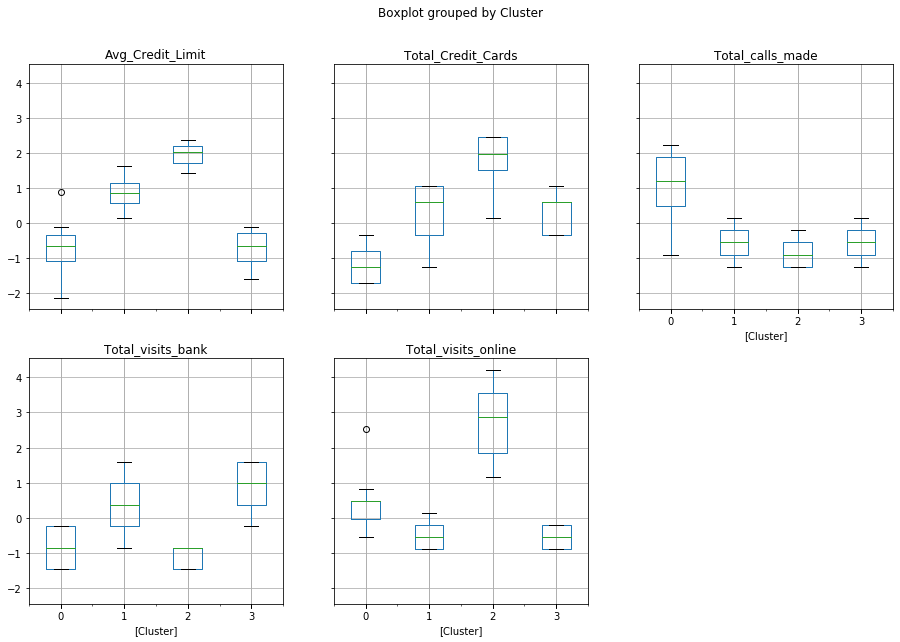

In [46]:
# View the distributions of each feature within each cluster by means of a boxplot.
customerData_k4.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

In [47]:
# Cluster Observations.
# Clusters 0 1 and 2 seem to coincide mostly with that of the k=3 clusters, except that cluster 1 has been split into 2 clusters which are now clusters 1 and 3.
# There is a bit more overlapping of the clusters now.
# Cluster 3: Characterised by high bank visits, low credit limits and intermediate amount of cards.
#            These are probably old timers, they have a few credit cards because they're too nice to say no to the telemarketers who offer it to them, however,
#            they keep their limits low because they don't really plan on using them. They go into the bank personally because they don't really know how else one
#            would contact the bank.

In [48]:
# KMeans conclusion.
# With k=3 the clusters are more distinct than with k=4.
# However, with k=3 one of the clusters are much larger than the other 2 clusters.
# The extra cluster from the k=4 cluster does seem to split the large cluster from the k=3 model quite well.
# So if we had more demographic information we could decide that the large cluster from k=3 is too generalised and that we want to split it.
# Then k=4 will come in handy.
# For now K=3 is more distinct and we will stick with it. (We keep the boomers and old timers in one group)

### Hierarchical Clustering

,CophCoeff
ward,0.7465
complete,0.8381
average,0.8693
single,0.6936


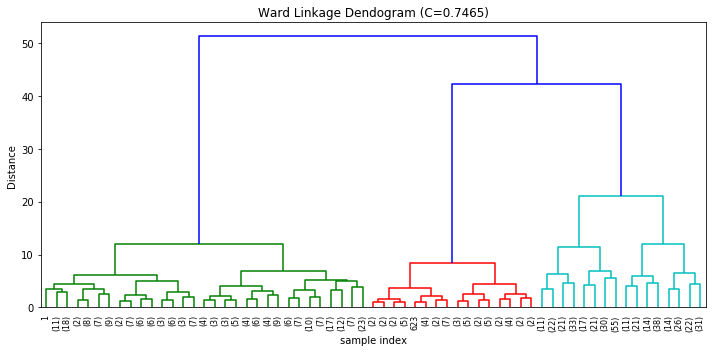

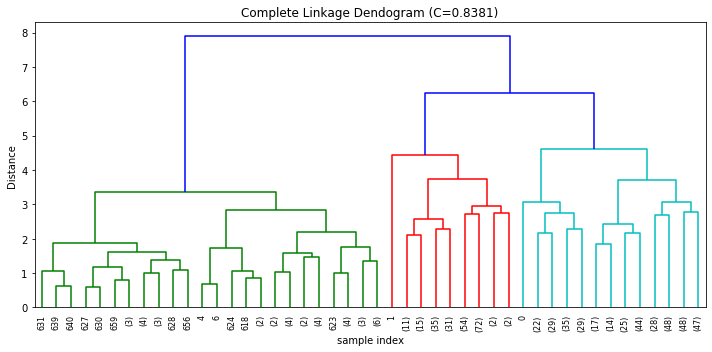

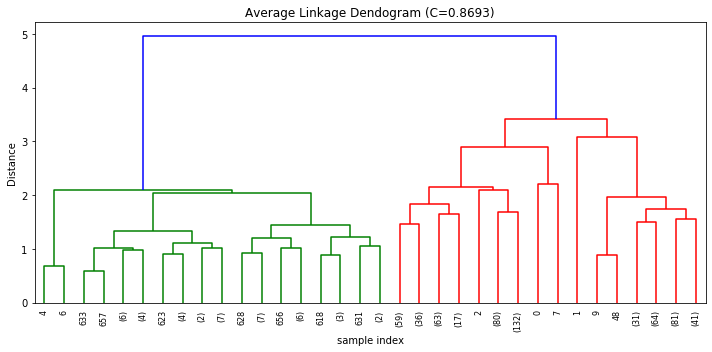

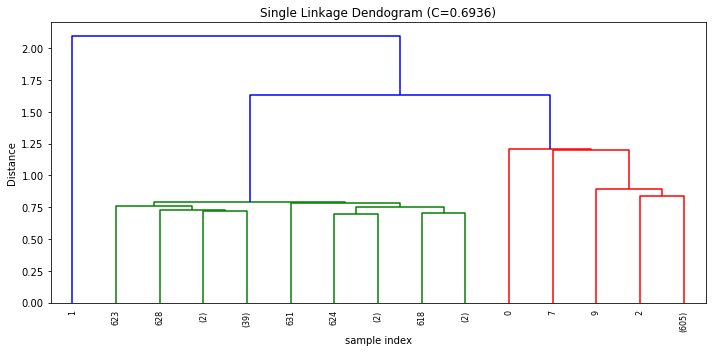

In [49]:
linkageTypes = ['ward', 'complete', 'average', 'single']
cophCoeff = [] # Cophenetic Coefficient

for linkageType in linkageTypes:
    Z = linkage(customerData_f, metric='euclidean', method=linkageType)
    c, coph_dists = cophenet(Z , pdist(customerData_f))
    cophCoeff.append(c)
    
    plt.figure(figsize=(10, 5))
    plt.title(linkageType.capitalize() + " Linkage Dendogram (C={:.4f})".format(c))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    # Create the dendrogram, just veiw 5 levels, otherwise it takes very long
    dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=8. )
    plt.tight_layout()

cophCoeff_df = pd.DataFrame(data=cophCoeff, columns=['CophCoeff'], index=linkageTypes)
cophCoeff_df

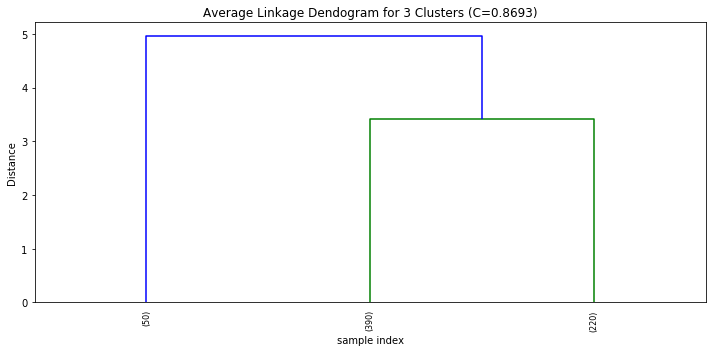

In [50]:
# The Average Linkage method has the best Cophenetic Coefficient.
# From the average linkage dendogram we can see that after 3 clusters, there will be a cluster which only has 1 record.
# So it does not make sense to use more than 3 clusters when using average linkage.
# Draw the dendrogram for 3 clusters and average linkage.
Z = linkage(customerData_f, metric='euclidean', method='average')

plt.figure(figsize=(10, 5))
plt.title("Average Linkage Dendogram for 3 Clusters (C={:.4f})".format(cophCoeff_df.loc['average'][0]))
plt.xlabel('sample index')
plt.ylabel('Distance')
# Create the dendrogram, just veiw 5 levels, otherwise it takes very long
dendrogram(Z, truncate_mode='lastp', p=3, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()

In [51]:
# Create an agglomerative clustering model with average linkage and 3 clusters.
model_avg3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_avg3.fit(customerData_f)
# Add the labels to the customerData.
customerData_avg3 = customerData_f.copy()
customerData_avg3['Cluster'] = model_avg3.labels_
customerData_avg3.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.6305,-1.2492,-0.8605,-0.5475,-1.2515,2
1,0.8854,-0.7876,-1.4737,2.5205,1.8919,0
2,0.8854,1.0590,-0.8605,0.1343,0.1455,2


In [52]:
# For the sake of completeness, make a model with complete linkage as well, because complete linkage cophenetic coefficient is also high.
# Create an agglomerative clustering model with average linkage and 3 clusters.
model_comp3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model_comp3.fit(customerData_f)
# Add the labels to the customerData.
customerData_comp3 = customerData_f.copy()
customerData_comp3['Cluster'] = model_comp3.labels_
customerData_comp3.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.6305,-1.2492,-0.8605,-0.5475,-1.2515,0
1,0.8854,-0.7876,-1.4737,2.5205,1.8919,2
2,0.8854,1.0590,-0.8605,0.1343,0.1455,0


In [53]:
# Have a look how many records are in each cluster for average linkage. We can actaully see this from the dendrogram.
customerData_avg3.groupby(['Cluster']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,220,220,220,220,220
1,50,50,50,50,50
2,390,390,390,390,390


In [54]:
# Have a look how many records are in each cluster for complete linkage. We can actaully see this from the dendrogram.
customerData_comp3.groupby(['Cluster']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,387,387,387,387,387
1,50,50,50,50,50
2,223,223,223,223,223


In [55]:
# One can see that the clusters are very similar.
# These amounts are very similar to those from the KMeans clustering with k=3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C69B2188>,
      dtype=object)

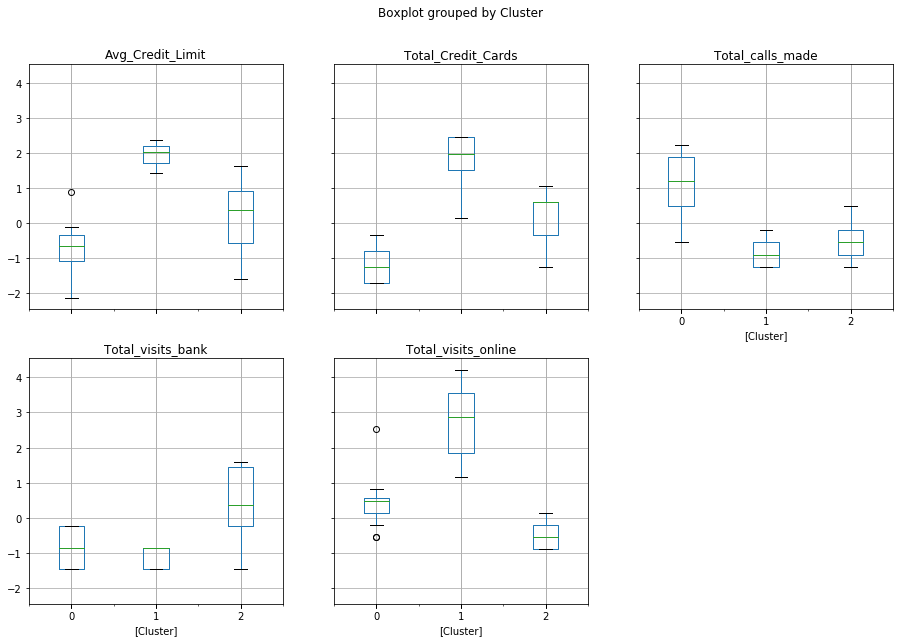

In [56]:
# View the distributions of each feature within each cluster for average linkage.
customerData_avg3.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C6C3B408>,
      dtype=object)

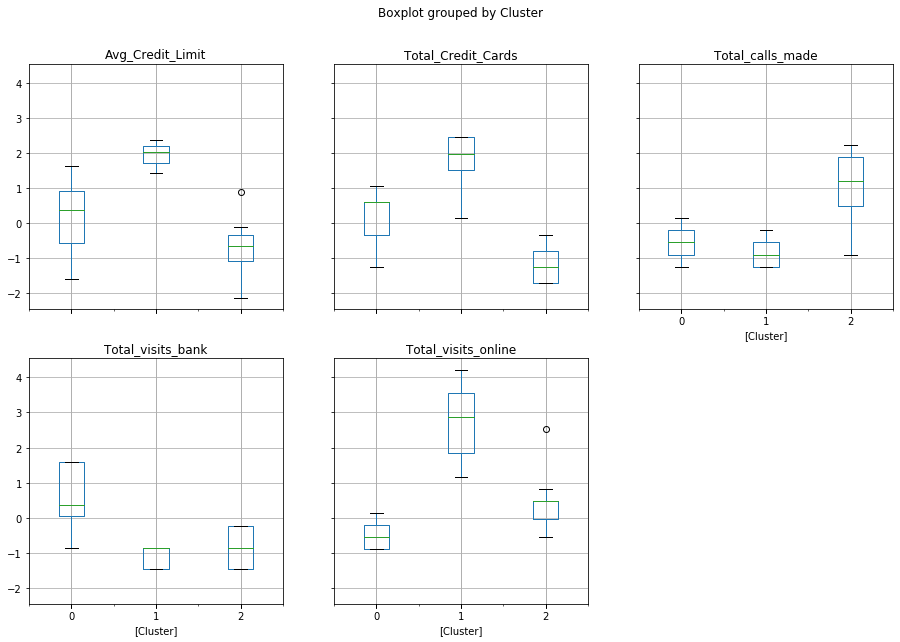

In [57]:
# View the distributions of each feature within each cluster for average linkage.
customerData_comp3.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

In [58]:
# Both agglomerative cluster distributions look very similar. The linkage only affects the clustering mildly for 3 clusters.
# These distributions look very similar to the KMeans distributions with k=3.

In [59]:
# Also do agglomerative clustering for 4 clusters.
# Use complete linkage for agglomerative clustering with 4 clusters.
# Because average linkage has a cluster with only 1 record for 4 cluster.
# For the sake of completeness, make a model with complete linkage as well, because complete linkage cophenetic coefficient is also high.
# Create an agglomerative clustering model with average linkage and 3 clusters.
model_comp4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='complete')
model_comp4.fit(customerData_f)
# Add the labels to the customerData.
customerData_comp4 = customerData_f.copy()
customerData_comp4['Cluster'] = model_comp4.labels_
customerData_comp4.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.6305,-1.2492,-0.8605,-0.5475,-1.2515,3
1,0.8854,-0.7876,-1.4737,2.5205,1.8919,0
2,0.8854,1.0590,-0.8605,0.1343,0.1455,3


In [60]:
# Have a look how many records are in each cluster for complete linkage. We can actaully see this from the dendrogram.
customerData_comp4.groupby(['Cluster']).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,223,223,223,223,223
1,50,50,50,50,50
2,271,271,271,271,271
3,116,116,116,116,116


In [61]:
# Two of the clusters differ quite a bit from the KMeans with k=4 clustering.
# It can be seen that about 50 records have been moved from one cluster to the other.
# Meaning that the cluster with 271 records here only had 219 records with the KMeans method and the cluster that has 116 records here had 168 records with kmenas.
# This is interesting.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C65D5288>,
      dtype=object)

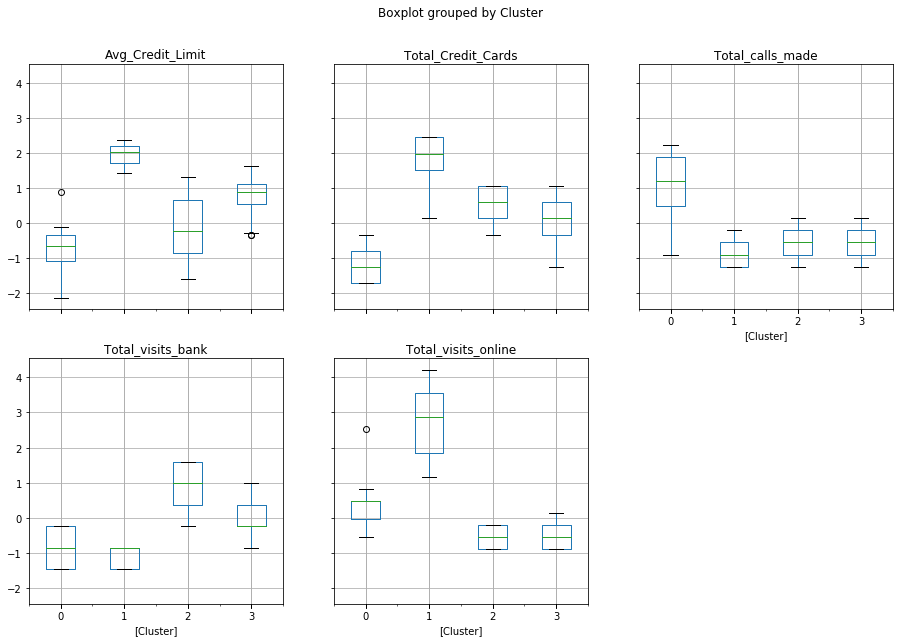

In [62]:
# View the distributions of each feature within each cluster for average linkage.
customerData_comp4.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

In [63]:
# The group with low credit limit and low number of cards has stayed similar to that of the KMeans method.
# The group with high credit limit and high number of cards has stayed similar to that of the KMeans method.
# The groups with mid range credit limits and card numbers have been split differently from the KMeans method.
# For the agglomerative method, the mid range groups seem to overlap slightly on all features.
# For the KMeans method, the mid range groups have non overlapping credit limits, but the rest of the features overlap.
# So it seems that the KMeans method clusters are more distinctive for 4 clusters.

### Method Comparison

In [64]:
# Find the silhouette scores for all the methods and compare them/

# Find the silhouette score for the KMeans with k=3 method.
silScore_k3 = silhouette_score(customerData_f, model_k3.labels_)
# Find the silhouette score for the agglomerative clustering method.
silScore_avg3 = silhouette_score(customerData_f, model_avg3.labels_)
# Find the silhouette score for the agglomerative clustering method.
silScore_comp3 = silhouette_score(customerData_f, model_comp3.labels_)
# Find the silhouette score for the KMeans with k=4 method, just to check if it is better or not.
silScore_k4 = silhouette_score(customerData_f, model_k4.labels_)
# Find the silhouette score for the agglomerative clustering method.
silScore_comp4 = silhouette_score(customerData_f, model_comp4.labels_)

# Create a dictionary with all the values in arrays.
methods = ["KMeans3", "AggAvg3", "AggComp3", "KMeans4", "AggComp4"]
clusters = [3, 3, 3, 4, 4]
silScores = [silScore_k3, silScore_avg3, silScore_comp3, silScore_k4, silScore_comp4]
comparison_dict = {"Method":methods, "Num Clusters":clusters, "Silhouette Score":silScores}
comparison_dict

{'Method': ['KMeans3', 'AggAvg3', 'AggComp3', 'KMeans4', 'AggComp4'],
 'Num Clusters': [3, 3, 3, 4, 4],
 'Silhouette Score': [0.4930010449995642,
  0.49034360706924646,
  0.492940751274099,
  0.3849070337583928,
  0.3078022092266158]}

In [65]:
# Create a dataframe to compare all the silhouette scores.
comparison_df = pd.DataFrame(comparison_dict)
comparison_df

,Method,Num Clusters,Silhouette Score
0,KMeans3,3,0.4930
1,AggAvg3,3,0.4903
2,AggComp3,3,0.4929
3,KMeans4,4,0.3849
4,AggComp4,4,0.3078


In [66]:
# The methods whith 3 clusters have much better silhouette scores than the methods with 4 clusters.
# This confirms that 3 clusters are more distinct than 4 clusters.
# KMeans with k=3 clustering performed the best of all the methods.
# Agglomerative clustering with 3 complete linkage and 3 clusters is basically just as good as the KMeans method.
# Surprisingly the model with complete linkage has a higher silhouette score than the model with average linkage,
# despite the fact the average linkage has the bes cophenetic coeeficient.

### Final Clustering Model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203C87D7488>,
      dtype=object)

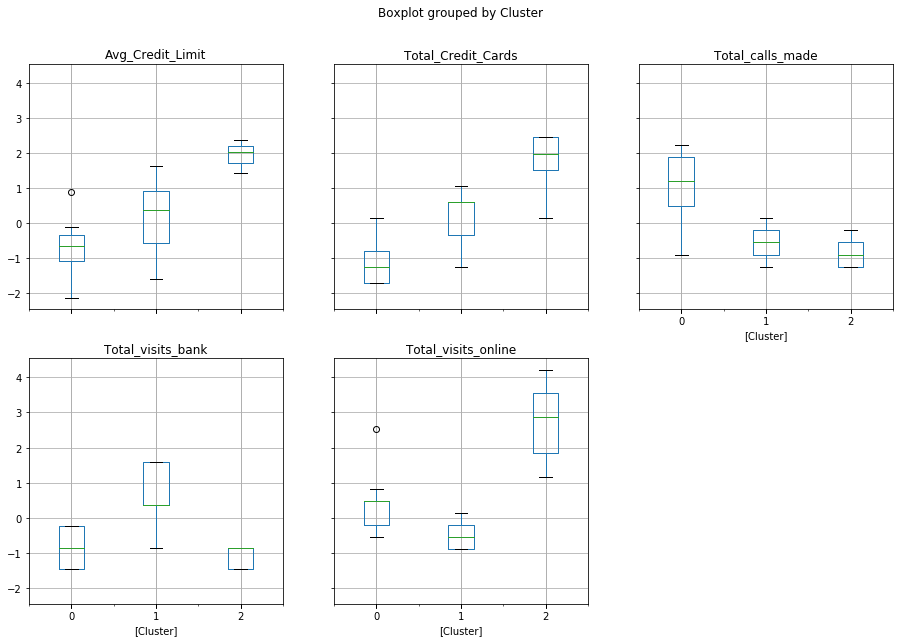

In [67]:
# The best clustering model was the Kmeans model with k=3.
# Display the box plots here again.
# View the distributions of each feature within each cluster by means of a boxplot.
customerData_k3.boxplot(by='Cluster', layout=(2,3), figsize=(15,10))

#### Final analysis
- The clusters are quite distinct and there is not that much overlapping of features.
- The model was able to seperate the clusters into different distributions of Avg_Credit_Limit and Total_Credit_Cards.
- The clusters are quite clearly sparated by contact medium, meaning that each cluster clearly has a favourite method of contacting the bank.
- This implies that there is a definate between the credit limit and number of cards a customer has and the method by which a customer prefers to contact the bank.
- People with high limit and high number of cards prefer to use online banking.
- People with mid range credit limits and card numbers prefer to vist the bank personally.
- People with low credit limits and low number of cards prefer to call the bank.